## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
from datetime import datetime
style.use('fivethirtyeight')

In [5]:
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
# Initial Testing for NaN values.
rainfall_df.dropna(inplace=True)
print(rainfall_df.head())

   day  hour  minute  rainfall_rate
0    1     0       0              0
1    1     0       1              0
2    1     0       2              0
3    1     0       3              0
4    1     0       4              0


In [6]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rainfall Rate')

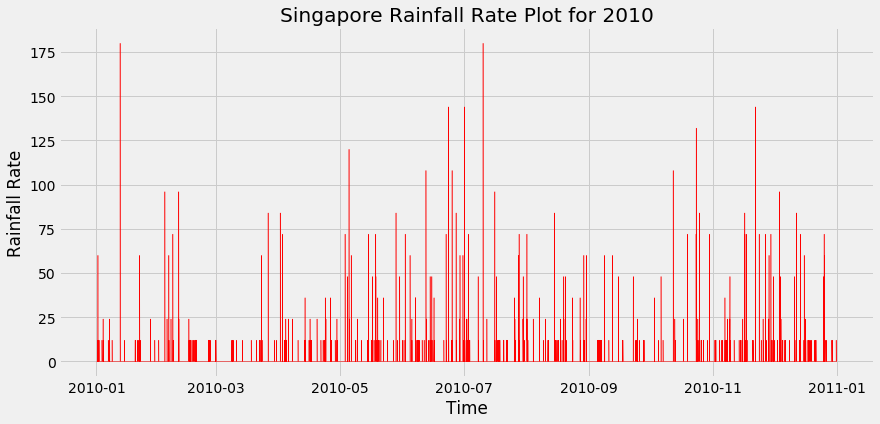

In [7]:
# Initial Yearly Plot
plt.rcParams["figure.figsize"] = (13,6) # For Increasing Size of graph
plt.plot(rainfall_df.index.values, rainfall_df['rainfall_rate'], linewidth=0.5, color='r')
plt.title('Singapore Rainfall Rate Plot for 2010')
plt.xlabel('Time')
plt.ylabel('Rainfall Rate')

### Calculate the daily rainfall rate.
For this `Group-By` is to be used for grouping together based on the day for each month.

In [8]:
daily_groups = rainfall_df.groupby([rainfall_df.index.month, rainfall_df.index.day])['rainfall_rate'].sum() # grouping based on the month and day.

Text(0, 0.5, 'Rainfall Rate')

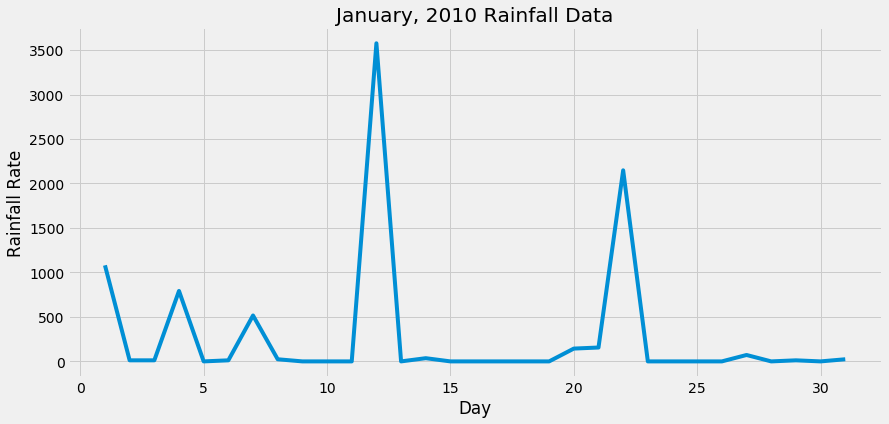

In [20]:
# For example plot the January Data
plt.title("January, 2010 Rainfall Data")
plt.plot(daily_groups[1])
plt.xlabel('Day')
plt.ylabel('Rainfall Rate')

In [ ]:
# Complicated
# def parse_date(day):
#     start = datetime(2009,12,31)
#     delta = timedelta(days=int(day))
#     new_date = start + delta
#     return new_date
# dataframe['date'] = dataframe['day'].astype(str).map(parse_date)

In [ ]:
# Experimental code for making timestamp x-axis
# g = rainfall_df.groupby([rainfall_df.index.month, rainfall_df.index.day])
# january = g.get_group((1,1))
# january['rate'] = january['rainfall_rate'].sum()
# plt.plot(january.index, january['rate'])

In [ ]:
#rainfall_df['rainfall_rate'] + '' + rainfall_df.index.astype(str)

In [ ]:
#g1 = rainfall_df.groupby(pd.to_datetime(rainfall_df.index).date)

In [ ]:
#plt.plot(g1.get_group(pd.Timestamp(2010, 1, 1)).index, g1.get_group(pd.Timestamp(2010, 1, 1))['rainfall_rate'])

### Precipitation Data 2010

* The dataset is in a **NetCDF** format.
* Using **xarray** package to access the data.

In [16]:
precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
precip_dataset

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 365)
Coordinates:
  * latitude   (latitude) float32 -49.975 -49.925 -49.875 ... 49.924995 49.975
  * longitude  (longitude) float32 -179.975 -179.925 ... 179.92499 179.975
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    institution:       Climate Hazards Group.  University of California at Sa...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

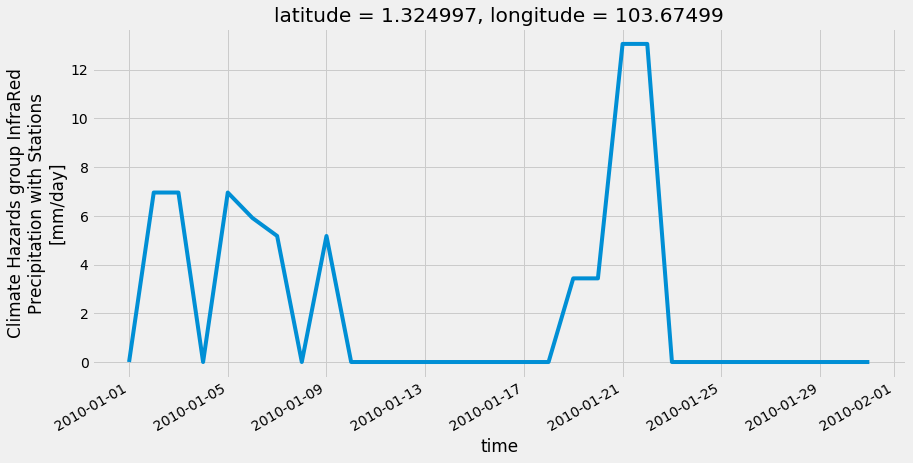

In [18]:
precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).plot(size=6)